In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("/content/survey lung cancer.csv")

In [4]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Data preprocessing


In [5]:
df .isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each non-numeric column
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])



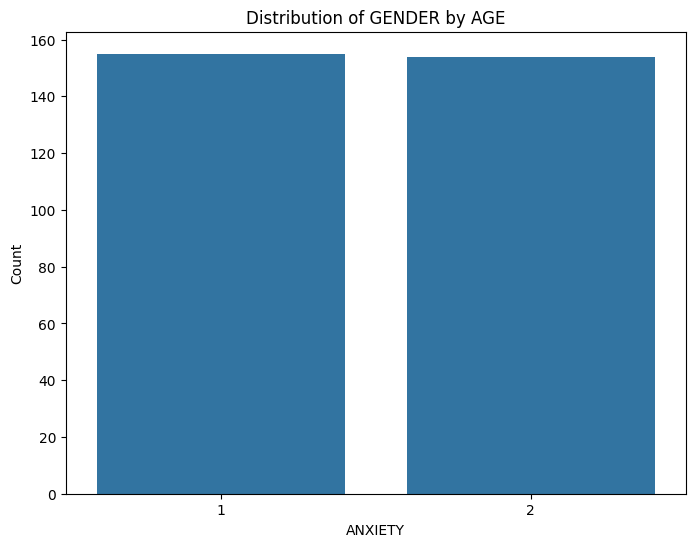

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ANXIETY', data=df)
plt.title('Distribution of GENDER by AGE')
plt.xlabel('ANXIETY')
plt.ylabel('Count')
plt.show()

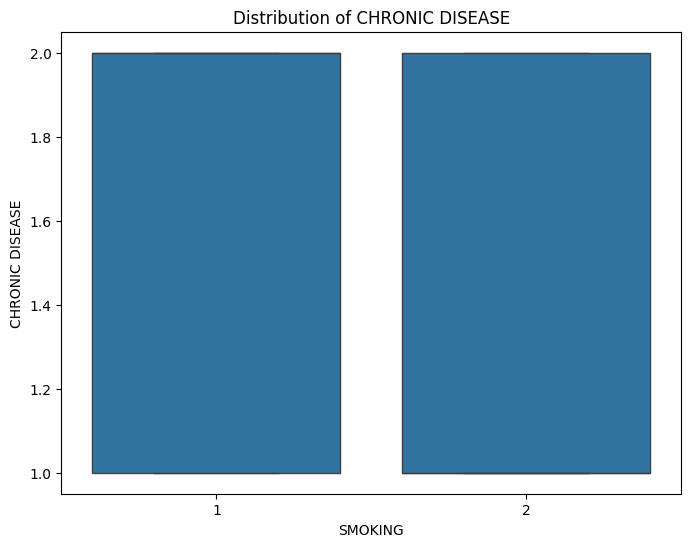

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x= 'SMOKING',	y='CHRONIC DISEASE', data=df)
plt.title('Distribution of CHRONIC DISEASE')
plt.ylabel('CHRONIC DISEASE')
plt.show()

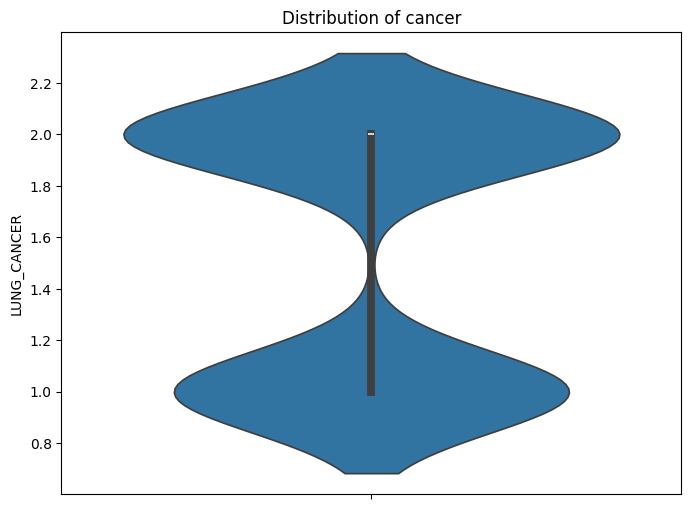

In [9]:
plt.figure(figsize=(8, 6))
sns.violinplot(y='CHEST PAIN', data=df)
plt.title('Distribution of cancer')
plt.ylabel('LUNG_CANCER')
plt.show()

In [10]:
# Splitting features and target variable
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())

           GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count  309.000000  309.000000  309.000000      309.000000  309.000000   
mean     0.524272   62.673139    1.563107        1.569579    1.498382   
std      0.500221    8.210301    0.496806        0.495938    0.500808   
min      0.000000   21.000000    1.000000        1.000000    1.000000   
25%      0.000000   57.000000    1.000000        1.000000    1.000000   
50%      1.000000   62.000000    2.000000        2.000000    1.000000   
75%      1.000000   69.000000    2.000000        2.000000    2.000000   
max      1.000000   87.000000    2.000000        2.000000    2.000000   

       PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count     309.000000       309.000000  309.000000  309.000000  309.000000   
mean        1.501618         1.504854    1.673139    1.556634    1.556634   
std         0.500808         0.500787    0.469827    0.497588    0.497588   
min         1.000000         1.000

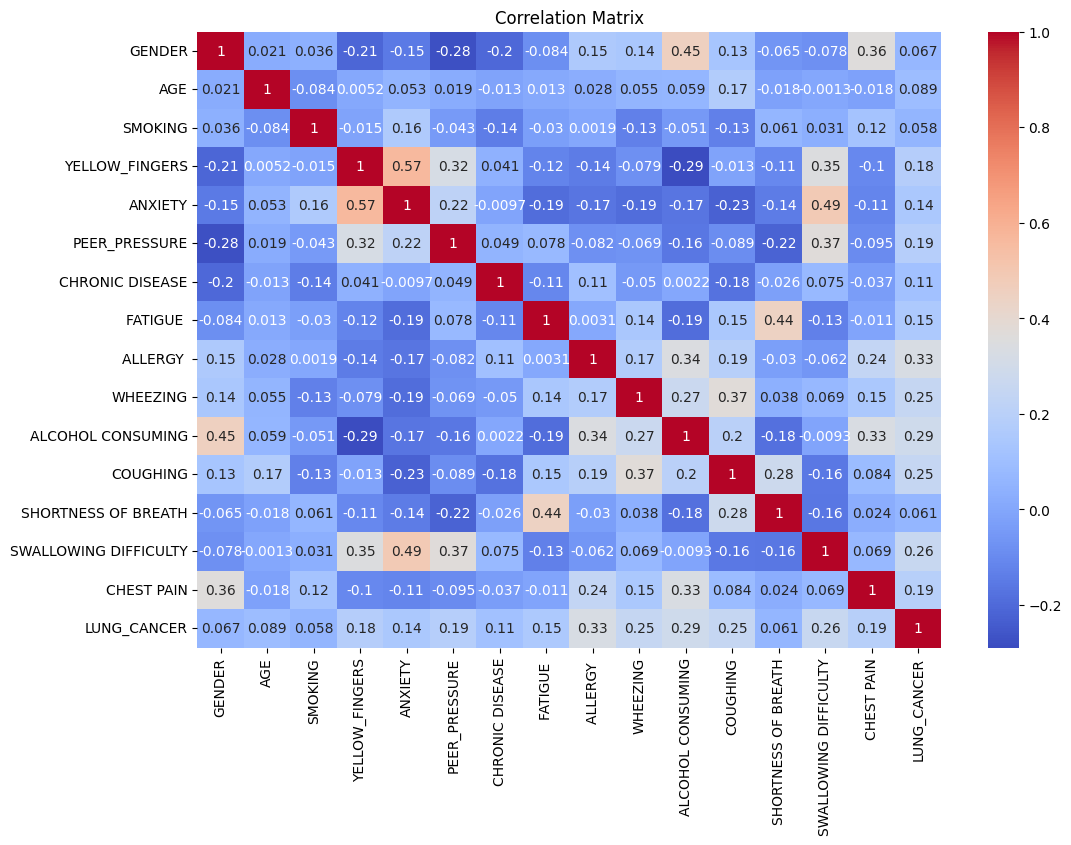

In [12]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Model Building
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.93548387 0.87096774 0.93548387 0.90322581 0.95081967]


In [14]:
# Test set evaluation
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

Confusion Matrix:
[[ 1  1]
 [ 1 59]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

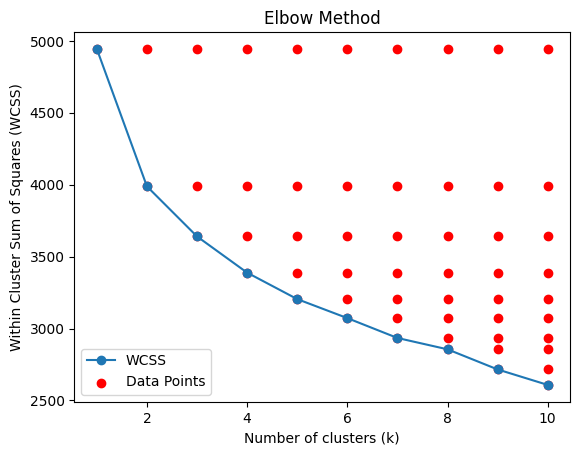

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Drop the target variable before clustering
X_clustering = df.drop(columns=['LUNG_CANCER'])

# Scale the features
scaler = StandardScaler()
X_scaled_clustering = scaler.fit_transform(X_clustering)

# Elbow Method to determine the optimal number of clusters
data_points = []
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled_clustering)
    data_points.append(kmeans.cluster_centers_)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss, marker='o', label='WCSS')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')

for i in range(1, 11):
    plt.scatter([i] * i, wcss[:i], color='red')

plt.legend(['WCSS', 'Data Points'])
plt.show()

# Based on the Elbow Method, let's choose the optimal number of clusters (let's say 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled_clustering)

